In [1]:
import numpy as np
import matplotlib.pyplot as plt

from params import *
from aux_functions import consecutive
from potential import int_potential, int_potential_attr, int_potential_rep, int_force

from itertools import combinations_with_replacement

plot_dir = 'Plots_McKeanVlasov_1d/'

In [2]:
# Parameters
L = 5.0
N = 1000
dx = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)


W = int_potential(x)
W_a = int_potential_attr(x)
W_r = int_potential_rep(x)


grad_W = int_force(x)
grad_W_sup = np.max(np.sqrt(grad_W**2))

/home/freddy/Dokumente/work/Studium/Masterarbeit/Paper/Code_Paper/potential.py:175: RuntimeWarning: invalid value encountered in divide
  force = ((-c_a*np.sinh((np.abs(dist)-L/2)/l_a)*dist)/(l_a*np.sinh(L/(2*l_a))*np.abs(dist))) + ((c_r*np.sinh((np.abs(dist)-L/2)/l_r)*dist)/(l_r*np.sinh(L/(2*l_r))*np.abs(dist)))


W(k=0) = -0.4025146012495264
W(k=1) = -0.5542608664998184


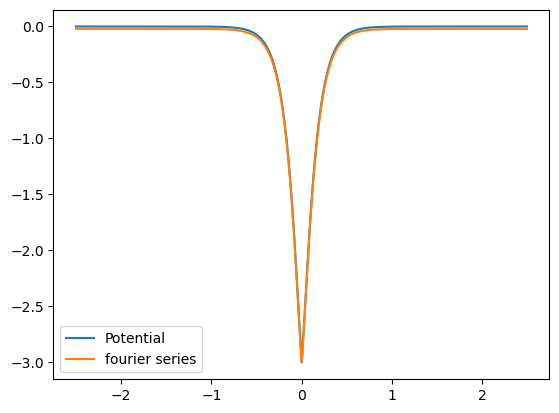

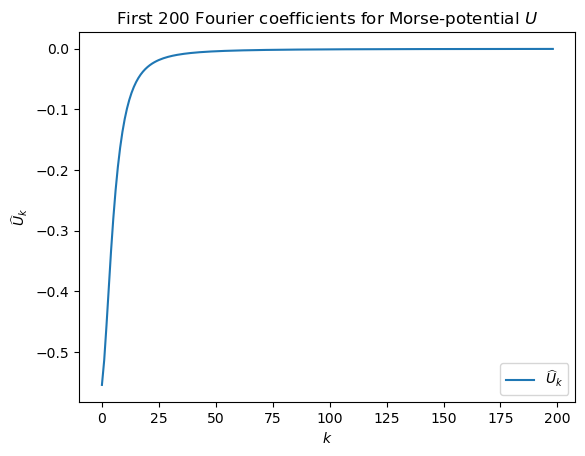

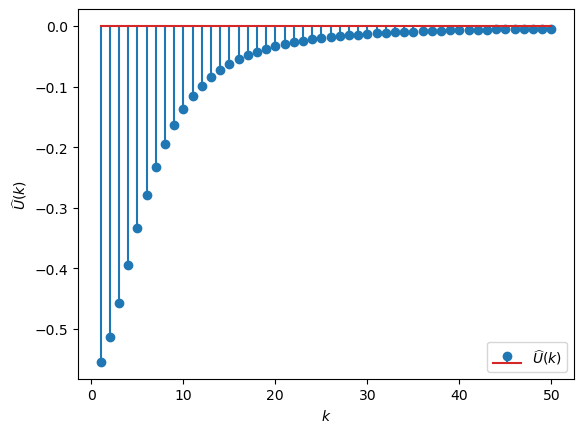

sum of squared errors: 0.4527511835257637
beta_c: 5.705395872774314
sigma_c: 0.5920687048034112


In [3]:
'''
Computation of the Fourier-coefficients of the Morse-potential 
and the resulting critical sigma as described in the Paper by Carillo et. al. (2020)
'''
def fourier_coeff_CAR(k):
    cosine = np.cos((2*k*np.pi*x)/L) * np.sqrt(2/L)
    integral = np.sum(W * cosine * dx) 
    return integral

A_0 = 1/np.sqrt(L) * np.sum(W * dx)

print('W(k=0) = ' + str(A_0))

fourier_series = A_0*0.5
coeff_list = []


for i in range(1,200):
    cosine = np.cos((2*i*np.pi*x)/L)
    coeff = fourier_coeff_CAR(i)
    coeff_list.append(coeff)
    fourier_series +=  coeff*cosine * np.sqrt(2/L)

print('W(k=1) = ' + str(coeff_list[0]))

plt.plot(x, W, label='Potential')
plt.plot(x, fourier_series, label = 'fourier series')
plt.legend()
plt.show()

plt.plot(coeff_list, label=r'$\widehat{U}_k$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$\widehat{U}_k$')
plt.title(r'First $200$ Fourier coefficients for Morse-potential $U$')
plt.savefig(plot_dir + 'FourierCoefficients_Carillo.pdf', bbox_inches='tight', transparent=True)
plt.show()


x_list = np.asarray([i for i in range(1, len(coeff_list))])

plt.clf()
plt.stem(x_list[:50], coeff_list[:50], label=r'$\widehat{U}(k)$')
plt.legend()
plt.xlabel(r'$k$')
plt.ylabel(r'$\widehat{U}(k)$')
#plt.title(r'First $50$ Fourier coefficients for Morse-potential $U$')
plt.savefig(plot_dir + 'FourierCoefficients_Carillo_Stemplot.pdf', bbox_inches='tight', transparent=True)
plt.show()
diff = W - fourier_series

print('sum of squared errors: ' + str(np.sum(diff*diff)))

coeff_list = np.array(coeff_list)

beta_c =  -np.sqrt(L*2) / np.min(coeff_list)
print('beta_c: ' + str(beta_c))

sigma_c = np.sqrt(2/beta_c)
print('sigma_c: ' + str(sigma_c))


W(k=0) = -0.3600200041320652
W(k=1) = -0.3505453512075889


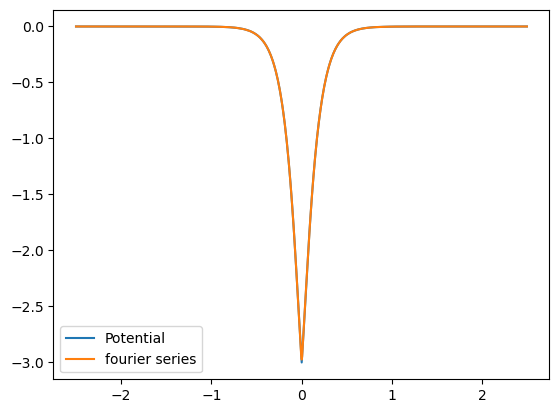

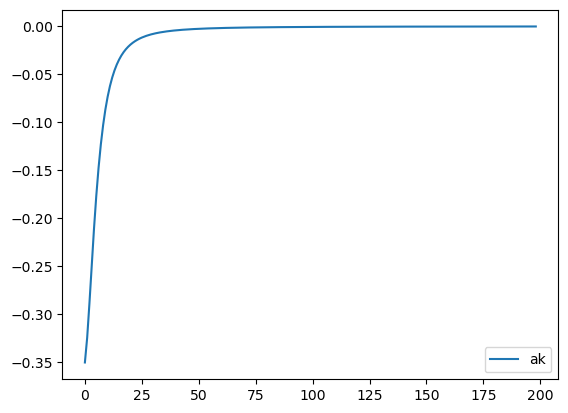

sum of squared errors: 0.0013034874819274692
beta_c: 5.7053958727743135
sigma_c: 0.5920687048034112


In [4]:
'''
Computation of the Fourier-coefficients of the Morse-potential 
and the resulting critical sigma as described in the Paper by Bertoli et. al. (2025)
'''


def fourier_coeff_BER(k):
    cosine = np.cos((2*k*np.pi*x)/L) * (2/L)
    integral = np.sum(W * cosine * dx) 
    return integral

A_0 = fourier_coeff_BER(0)
print('W(k=0) = ' + str(A_0))

fourier_series = A_0*0.5
coeff_list = []

for i in range(1,200):
    cosine = np.cos((2*i*np.pi*x)/L)
    coeff = fourier_coeff_BER(i)
    coeff_list.append(coeff)
    fourier_series +=  coeff*cosine #* (1/L)

print('W(k=1) = ' + str(coeff_list[0]))

plt.plot(x, W, label='Potential')
plt.plot(x, fourier_series, label = 'fourier series')
plt.legend()
plt.show()

plt.plot(coeff_list, label='ak')
plt.legend()
plt.show()

diff = W - fourier_series

print('sum of squared errors: ' + str(np.sum(diff*diff)))

coeff_list = np.array(coeff_list)
coeff_list = -2/coeff_list

beta_c = np.min(coeff_list)
print('beta_c: ' + str(beta_c))

sigma_c = np.sqrt(2/beta_c)
print('sigma_c: ' + str(sigma_c))

